**1D Convection Equation**

In [12]:
from __future__ import division
from casadi import *
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
#from scipy.sparse import diags
from scipy.sparse import csc_matrix

In [13]:
def linearconv(nx):
    c = MX.sym('c')
    dx = MX.sym('dx')
    u = MX.sym('u',nx)
    Amatrix_data = numpy.hstack((numpy.ones(nx),-1*numpy.ones(nx-1)))
    Amatrix_rows = numpy.concatenate([numpy.linspace(0,nx-1,nx),numpy.linspace(1,nx-1,nx-1)])
    Amatrix_cols = numpy.concatenate([numpy.linspace(0,nx-1,nx),numpy.linspace(0,nx-2,nx-1)])
    A = MX(csc_matrix((Amatrix_data, (Amatrix_rows, Amatrix_cols)), shape=(nx, nx)))
    b = numpy.zeros(nx)
    b[0] = -1
    ode = (-c/dx)*(mtimes(A,u) + b)
    dae = {'x':u,'p':vertcat(c,dx),'ode':ode}
    opts = {}
    opts["fsens_err_con"] = True
    opts["quad_err_con"] = True
    opts["abstol"] = 1e-6
    opts["reltol"] = 1e-6
    tend = 0.5
    opts["t0"] = 0
    opts["tf"] = tend
    dt = 0.025
    ts = numpy.linspace(0,tend,tend/dt)
    opts["grid"] = ts
    opts["output_t0"] = True
    F = integrator("F","cvodes",dae,opts)
    L = 2

    x = numpy.linspace(0,L,nx+1)
    
    c = 1
    dx = L/nx
    u0 = numpy.ones(nx)
    u0[numpy.intersect1d(numpy.where(x >= 0.5), numpy.where(x <= 1))] = 2
    sol = F(x0 = u0, p = (c,dx))
    sol = sol['xf'].full().T
    ufinal = np.insert(sol[-1,:], 0,-b[0])
    pyplot.plot(x, ufinal, color='#003366', ls='--', lw=3)
    pyplot.ylim(0,2.5)

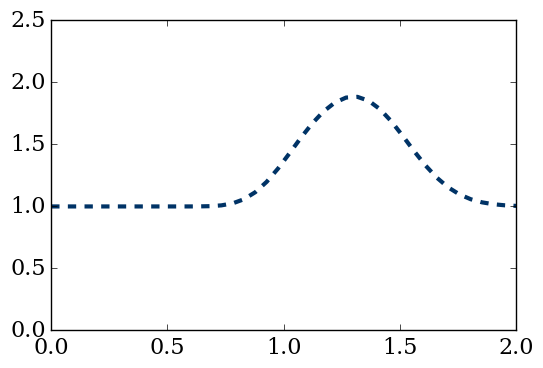

In [14]:
linearconv(41)

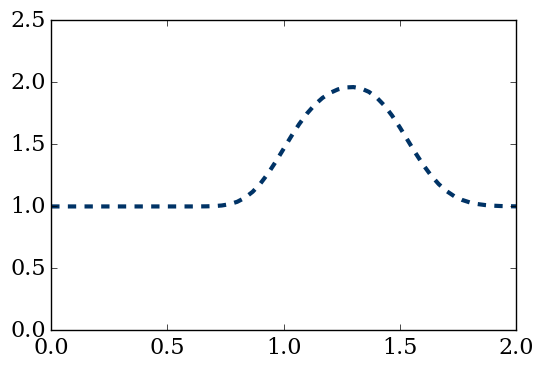

In [15]:
linearconv(60)

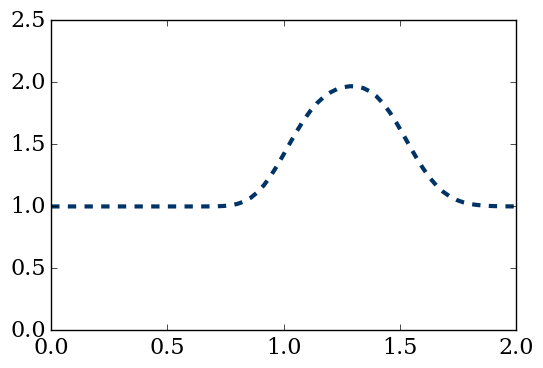

In [16]:
linearconv(70)

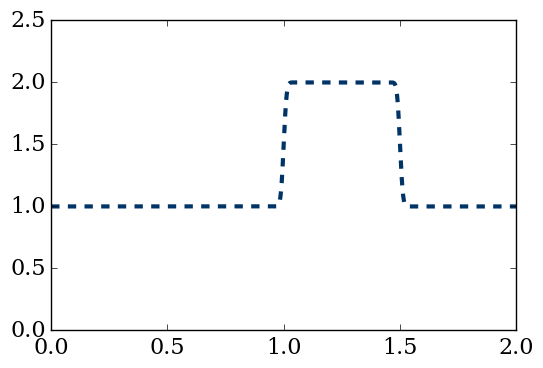

In [17]:
linearconv(10000)